# Downloading data from the fixed met stations

Seklima (https://seklima.met.no) doe snot allow to download large amount of data, instead, we must use https://frost.met.no. Here, I setup the API and attempt to download the data from the stations nearby Longyearbyen. This code is adapted from https://frost.met.no/python_example.html. Elements ar eavailable at this page: https://frost.met.no/elementtable.

In [1]:
import requests
import pandas as pd
from tqdm import tqdm
import numpy as np

import platform
if platform.system() =='Linux': path='/home/clc/Desktop/AGF350_data/Data/'
elif platform.system() =='Windows': path='../Data/'

# Insert your own client ID here
client_id = '83df1705-b64e-4a54-a0b9-825064fc860c' # this is a client_id for Clément Cherblanc

In [2]:
# Define endpoint and parameters
endpoint = 'https://frost.met.no/observations/v0.jsonld'
parameters = {
    'sources': 'SN99840',#use "XXX,YYY" (comma) for multiple stations, variable, etc.
    'elements': 'wind_from_direction', 
    'referencetime': '2023-11-02/2024-01-01',
    #'referencetime': '1995-01-02/2024-01-01',
}
# Issue an HTTP GET request
r = requests.get(endpoint, parameters, auth=(client_id,''))
# Extract JSON data
json = r.json()

In [3]:
# Check if the request worked, print out any errors
if r.status_code == 200:
    data = json['data']
    print('Data retrieved from frost.met.no!')
else:
    print('Error! Returned status code %s' % r.status_code)
    print('Message: %s' % json['error']['message'])
    print('Reason: %s' % json['error']['reason'])

Data retrieved from frost.met.no!


In [4]:
# Initialize an empty list to store rows
rows = []

for i in tqdm(range(len(data))):
    row = pd.DataFrame(data[i]['observations'])
    row['referenceTime'] = data[i]['referenceTime']
    row['sourceId'] = data[i]['sourceId']
    rows.append(row)  # Append the DataFrame to the list

# Use pd.concat() to merge all rows at once
df = pd.concat(rows, ignore_index=True)

# Reset index (optional, but useful for clean DataFrame)
df = df.reset_index(drop=True)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8640/8640 [00:02<00:00, 3001.48it/s]


In [5]:
df

,elementId,value,unit,level,timeOffset,timeResolution,timeSeriesId,performanceCategory,exposureCategory,qualityCode,referenceTime,sourceId
0,wind_from_direction,109,degrees,"{'levelType': 'height_above_ground', 'unit': '...",PT0H,PT1H,0,C,2,0,2023-11-02T00:00:00.000Z,SN99840:0
1,wind_from_direction,109,degrees,"{'levelType': 'height_above_ground', 'unit': '...",PT0H,PT10M,0,C,2,0,2023-11-02T00:00:00.000Z,SN99840:0
2,wind_from_direction,110,degrees,"{'levelType': 'height_above_ground', 'unit': '...",PT0H,PT10M,0,C,2,0,2023-11-02T00:10:00.000Z,SN99840:0
3,wind_from_direction,120,degrees,"{'levelType': 'height_above_ground', 'unit': '...",PT20M,PT30M,0,C,2,2,2023-11-02T00:20:00.000Z,SN99840:0
4,wind_from_direction,113,degrees,"{'levelType': 'height_above_ground', 'unit': '...",PT0H,PT10M,0,C,2,0,2023-11-02T00:20:00.000Z,SN99840:0
...,...,...,...,...,...,...,...,...,...,...,...,...
12342,wind_from_direction,209,degrees,"{'levelType': 'height_above_ground', 'unit': '...",PT0H,PT10M,0,C,2,0,2023-12-31T23:20:00.000Z,SN99840:0
12343,wind_from_direction,212,degrees,"{'levelType': 'height_above_ground', 'unit': '...",PT0H,PT10M,0,C,2,0,2023-12-31T23:30:00.000Z,SN99840:0
12344,wind_from_direction,197,degrees,"{'levelType': 'height_above_ground', 'unit': '...",PT0H,PT10M,0,C,2,0,2023-12-31T23:40:00.000Z,SN99840:0
12345,wind_from_direction,0,degrees,"{'levelType': 'height_above_ground', 'unit': '...",PT20M,PT30M,0,C,2,2,2023-12-31T23:50:00.000Z,SN99840:0


<Axes: xlabel='referenceTime'>

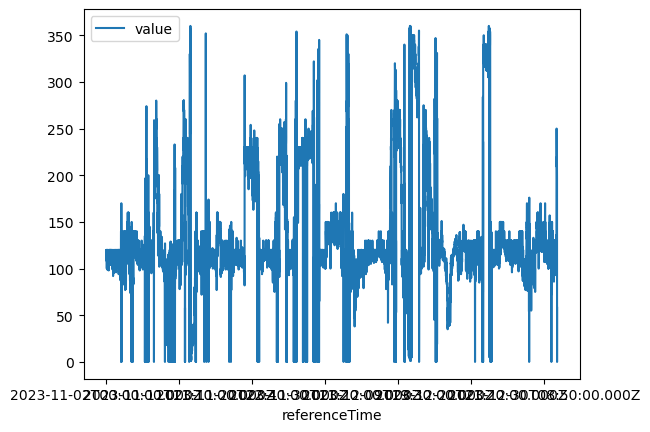

In [6]:
df.plot(x='referenceTime', y='value')

# It works! So let's download all the data needed

In [74]:
end_date_now = np.datetime64('2025-01-01')
stations = {'SN99868':{'name':'Endalen',  # ONLY HAS SOIL TEMP
                       'has_wind_data': False,
                       'id':'SN99868',
                       'elevation': 50,
                       'latitude': 78.1905,
                       'longitude': 15.7815,
                       'start_date': np.datetime64('2021-11-14'),
                       'end_date': end_date_now},
            'SN99877':{'name':'Adventdalen - Ice-wedge', # ONLY SOIL TEMP
                       'has_wind_data': False,
                       'id':'SN99877',
                       'elevation': 18,
                       'latitude':78.1805,
                       'longitude': 15.9828,
                       'start_date':np.datetime64('2019-08-26'),
                       'end_date': end_date_now},
            'SN99841':{'name':'Svalbard Lh - Platåberget',
                       'has_wind_data': False, ## IT'S SOMEHOW NOT WORKING
                       'wind_direction_data_name':'wind_from_direction',
                       'wind_speed_data_name':'wind_speed',
                       'wind_sensor_height':10, #in meters
                       'id':'SN99841',
                       'elevation': 435,
                       'latitude': 78.2342,
                       'longitude': 15.3595,
                       'start_date': np.datetime64('1998-09-12'),
                       'end_date': end_date_now},
            'SN99862':{'name':'Breinosa', #SOIL TEMP ONLY
                       'has_wind_data': False,
                       'id':'SN99862',
                       'elevation': 677,
                       'latitude':78.143,
                       'longitude':16.0665,
                        'start_date': np.datetime64('2022-03-25'),
                       'end_date': end_date_now},
            'SN99870':{'name':'Adventdalen',
                       'has_wind_data': False, ####True, 
                       'wind_direction_data_name':'wind_from_direction',
                       'wind_speed_data_name':'wind_speed',
                       'id':'SN99870',
                       'elevation': 15,
                       'latitude':78.2022,
                       'longitude':15.831,
                        'start_date': np.datetime64('2016-11-21'),
                       'end_date': end_date_now},
            'SN99855':{'name':'Longyeardalen - Valley Bottom', # ONLY SOIL TEMP
                       'has_wind_data': False,
                       'id':'SN99855',
                       'elevation': 63,
                       'latitude':78.2097,
                       'longitude':15.609,
                        'start_date': np.datetime64('2019-09-16'),
                       'end_date': end_date_now},
            'SN99864':{'name':'Nybyen',
                       'has_wind_data': True, 
                       'wind_direction_data_name':'mean(wind_from_direction PT1M)',
                       'wind_speed_data_name':'mean(wind_speed PT1M)',
                       'id':'SN99864',
                       'elevation': 114,
                       'latitude':78.201609,
                       'longitude':15.59266,
                        'start_date': np.datetime64('2023-11-03'),
                       'end_date': end_date_now},
             'SN99858':{'name':'Vannledningsdalen',
                        'has_wind_data': True, 
                       'wind_direction_data_name':'mean(wind_from_direction PT1M)',
                       'wind_speed_data_name':'mean(wind_speed PT1M)',
                       'id':'SN99858',
                       'elevation': 70,
                       'latitude':78.2128,
                       'longitude':15.633,
                        'start_date': np.datetime64('2023-11-03'),
                       'end_date': end_date_now},
            'SN99867':{'name':'Gruvefjellet - Blockfield Plateau', # ONLY SOIL TEMP
                       'has_wind_data': False,
                       'id':'SN99867',
                       'elevation': 464,
                       'latitude':78.1965,
                       'longitude':15.6317,
                        'start_date': np.datetime64('2022-03-26'),
                       'end_date': end_date_now}, 
            'SN99840':{'name':'Svalbard Lufthavn',
                       'has_wind_data': True, 
                       'wind_direction_data_name':'wind_from_direction',
                       'wind_speed_data_name':'wind_speed',
                       'id':'SN99840',
                       'elevation': 28,
                       'latitude':78.2453,
                       'longitude':15.5015,
                        #'start_date': np.datetime64('1964-10-16'),
                        'start_date': np.datetime64('1994-12-31'),
                       'end_date': end_date_now}, 
            'SN99861':{'name':'Longyearbyen Cemetery',
                       'has_wind_data': False, 
                       'wind_direction_data_name':'mean(wind_from_direction PT1M)',
                       'wind_speed_data_name':'mean(wind_speed PT1M)',
                       'id':'SN99861',
                       'elevation': 69,
                       'latitude':78.2148,
                       'longitude':15.6065,
                        'start_date': np.datetime64('2023-11-03'),
                       'end_date': np.datetime64('2023-11-29')}, 
            'SN99843':{'name':'Platåberget III',
                       'has_wind_data': True,
                       'wind_direction_data_name':'wind_from_direction',
                       'wind_speed_data_name':'wind_speed',
                       'id':'SN99843',
                       'elevation': 450,
                       'latitude':78.2278,
                       'longitude':15.378,
                        'start_date': np.datetime64('2018-02-01'),
                       'end_date': end_date_now}, 
            'SN99869':{'name':'Adventdalen - Loess Terrace', #ONLY SOIL TEMP
                       'has_wind_data': False,
                       'id':'SN99869',
                       'elevation': 7,
                       'latitude':78.2017,
                       'longitude':15.8293,
                        'start_date': np.datetime64('2019-08-24'),
                       'end_date': end_date_now}, 
            'SN99872':{'name':'Adventdalen - Upper Snowdrift', #ONLY SOIL TEMP
                       'has_wind_data': False,
                       'id':'SN99872',
                       'elevation': 10,
                       'latitude':78.1823,
                       'longitude':15.9453,
                        'start_date': np.datetime64('2019-09-03'),
                       'end_date': end_date_now}, 
            'SN99857':{'name':'Longyeardalen - Central',
                       'has_wind_data': True,
                       'wind_direction_data_name':'wind_from_direction',
                       'wind_speed_data_name':'wind_speed',
                       'id':'SN99857',
                       'elevation': 52,
                       'latitude':78.2127,
                       'longitude':15.6107,
                        'start_date': np.datetime64('2023-09-16'),
                       'end_date': end_date_now} }

## For all the above, I can download the whole time series at once, except for the airport

In [73]:
IDs_no_airport = 'SN99868,SN99877,SN99841,SN99862,SN99870,SN99855,SN99864,SN99858,SN99867,SN99861,SN99843,SN99869,SN99872,SN99857'
# airport: SN99840

def data_downloader(source, element, strt_end_date, verbose=True):
    # Define endpoint and parameters
    endpoint = 'https://frost.met.no/observations/v0.jsonld'
    parameters = {
        'sources': source,
        'elements': element, 
        'referencetime': strt_end_date,
        #'referencetime': '1995-01-02/2024-01-01',
    }
    # Issue an HTTP GET request
    r = requests.get(endpoint, parameters, auth=(client_id,''))
    # Extract JSON data
    json = r.json()

    # Check if the request worked, print out any errors
    if r.status_code == 200:
        data = json['data']
        if verbose:print('\t\tData retrieved from frost.met.no!')
    else:
        print('Error! Returned status code %s' % r.status_code)
        print('Message: %s' % json['error']['message'])
        print('Reason: %s' % json['error']['reason'])

        # Initialize an empty list to store rows
    rows = []
    
    for i in range(len(data)):
        row = pd.DataFrame(data[i]['observations'])
        row['referenceTime'] = data[i]['referenceTime']
        row['sourceId'] = data[i]['sourceId']
        rows.append(row)  # Append the DataFrame to the list
    
    # Use pd.concat() to merge all rows at once
    df = pd.concat(rows, ignore_index=True)
    
    # Reset index (optional, but useful for clean DataFrame)
    df = df.reset_index(drop=True)

    return df

#data_downloader(IDs_no_airport, 'wind_from_direction', '2025-01-01/2025-01-20')

In [28]:
def find_nb_days_month(year, month):
    if month in [1,3,5,7,8,10,12]: 
        return 31
    elif month in [4,6,9,11]:
        return 30
    elif month==2: 
        if year%400==0: return 29
        elif year%100==0: return 28
        elif year%4==0: return 29
        else: return 28
    else: print('Not a month (between 1 and 12 included)')


In [72]:
compute = False

if compute:
    for id_station in list(stations.keys()):
        #if id_station not in ['SN99841','SN99840']: #platåberget and the airport have too long time ranges, need to slice it
        if id_station not in []:#'SN99841']: #platåberget and the airport have too long time ranges, need to slice it
            if stations[id_station]['has_wind_data']:
                for var_name in [stations[id_station]['wind_direction_data_name'], stations[id_station]['wind_speed_data_name']]:
                    strt_year = str(stations[id_station]['start_date'])[:4]
                    strt_month = str(stations[id_station]['start_date'])[5:7]
                    print(id_station,  stations[id_station]['name'], var_name, '/'.join([str(stations[id_station]['start_date']),
                                                                                         str(stations[id_station]['end_date'])]))
                    
                    print('\tyear:', strt_year)
    
                    for month in range(int(strt_month), 13):
                        nb_days = find_nb_days_month(int(strt_year), month)
                        data_downloader(
                            id_station, var_name,
                            '/'.join([str(stations[id_station]['start_date']),
                                      str(strt_year)+'-'+str(month)+'-'+str(nb_days)]), verbose=False
                        ).to_csv(path+'SeklimaData/RawOutput/'+id_station+'_'+var_name+'_'+str(strt_year)+'-'+str(month)+'.csv') # The year that the data starts
                    
                    
                    for year in range(int(strt_year)+1, 2025):
                        
                        print('\tyear:', year)
    
                        for month in range(1, 13):
                            nb_days = find_nb_days_month(year, month)
                            data_downloader(
                                id_station, var_name,'/'.join([str(year)+'-'+str(month)+'-01',str(year)+'-'+str(month)+'-'+str(nb_days)])
                            , verbose=False).to_csv(path+'SeklimaData/RawOutput/'+id_station
                                     +'_'+var_name+'_'+str(year)+'-'+str(month)+'.csv') # Full year
                    
                    
                    print('\tyear: 2025')
                        
                    data_downloader(id_station,var_name, '2025-01-01/2025-02-01', verbose=False
                                   ).to_csv(path+'SeklimaData/RawOutput/'+id_station+'_'+var_name+'_2025_all.csv') # 2025
    
            
            else: print('Station '+id_station+' has no wind data')


## Re-aggregate the data

In [70]:
! ls "{path}SeklimaData/RawOutput/{id_station}_{var_}"*

'/home/clc/Desktop/AGF350_data/Data/SeklimaData/RawOutput/SN99864_mean(wind_speed PT1M)_2023-11.csv'
'/home/clc/Desktop/AGF350_data/Data/SeklimaData/RawOutput/SN99864_mean(wind_speed PT1M)_2023-12.csv'
'/home/clc/Desktop/AGF350_data/Data/SeklimaData/RawOutput/SN99864_mean(wind_speed PT1M)_2024-1.csv'
'/home/clc/Desktop/AGF350_data/Data/SeklimaData/RawOutput/SN99864_mean(wind_speed PT1M)_2024-10.csv'
'/home/clc/Desktop/AGF350_data/Data/SeklimaData/RawOutput/SN99864_mean(wind_speed PT1M)_2024-11.csv'
'/home/clc/Desktop/AGF350_data/Data/SeklimaData/RawOutput/SN99864_mean(wind_speed PT1M)_2024-12.csv'
'/home/clc/Desktop/AGF350_data/Data/SeklimaData/RawOutput/SN99864_mean(wind_speed PT1M)_2024-2.csv'
'/home/clc/Desktop/AGF350_data/Data/SeklimaData/RawOutput/SN99864_mean(wind_speed PT1M)_2024-3.csv'
'/home/clc/Desktop/AGF350_data/Data/SeklimaData/RawOutput/SN99864_mean(wind_speed PT1M)_2024-4.csv'
'/home/clc/Desktop/AGF350_data/Data/SeklimaData/RawOutput/SN99864_mean(wind_speed PT1M)_2024-5.

In [75]:
for id_station in list(stations.keys()):
    if stations[id_station]['has_wind_data']:
        fnames= ! ls {path}/SeklimaData/RawOutput/{id_station}*

        var_types = [stations[id_station]['wind_speed_data_name'],
        stations[id_station]['wind_direction_data_name']]

        for var_ in var_types:
            fnames_ = ! ls "{path}SeklimaData/RawOutput/{id_station}_{var_}"*
            df = pd.concat(map(pd.read_csv, fnames_), ignore_index=True).to_csv(path+'/SeklimaData/Output/'+id_station+'_'+var_+'.csv')

## Now let's inspect the files

In [95]:
ex_df = pd.read_csv(path+'/SeklimaData/Output/SN99858_mean(wind_speed PT1M).csv',
                    parse_dates=['referenceTime'], index_col='referenceTime')
ex_df.head(1)

,Unnamed: 0.1,Unnamed: 0,elementId,value,level,timeOffset,timeResolution,timeSeriesId,performanceCategory,exposureCategory,qualityCode,sourceId
referenceTime,,,,,,,,,,,,
2023-11-03 00:00:00+00:00,0,0,mean(wind_speed PT1M),1.5,"{'levelType': 'height_above_ground', 'unit': '...",PT0H,PT1M,0,C,2,2,SN99858:0


<Axes: xlabel='referenceTime'>

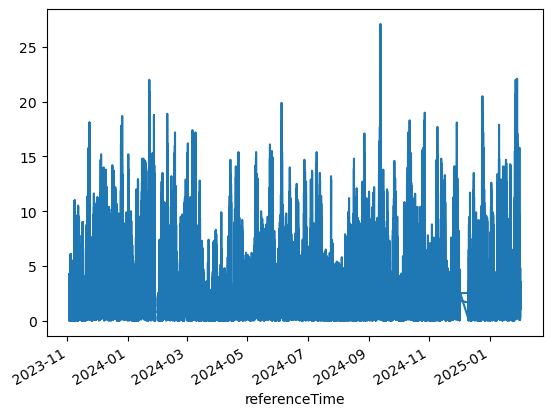

In [96]:
ex_df.value.plot()

# Marius' matlab code translated by ChatGPT

In [78]:
import requests
import datetime as dt
import numpy as np
import pandas as pd

# Define API options
opts = {
    "Content-Type": "application/json",
    "username": "eddc3c74-7a9d-4c7a-a735-b16774458354"
}

# Define date range
d1 = dt.datetime(2023, 9, 30, 0, 0, 0)
d2 = dt.datetime(2023, 10, 6, 0, 0, 0)

validfrom = d1.strftime('%Y-%m-%dT%H:%M:%SZ')
validto = d2.strftime('%Y-%m-%dT%H:%M:%SZ')
ts = f"{validfrom}/{validto}"

start_time = d1
end_time = d2
newTimes_1day = pd.date_range(start=start_time, end=end_time, freq='D')

# API URL
urltt = "https://frost-beta.met.no/api/v1/obs/met.no/filter/get?incobs=true"

# Define the variable to query
#vn = 'surface_air_pressure';
#vn = 'surface_temperature'
#vn = 'relative_humidity'
#vn = 'specific_humidity'
#vn = 'air_temperature'
#vn = 'mean(wind_speed PT1M)'
#vn = 'mean(wind_speed PT10M)'
vn = 'wind_speed'
#vn = 'mean(wind_from_direction PT1M)'
#vn = 'sum(precipitation_amount PT12H)'
#vn = 'sum(precipitation_amount PT1H)'
#vn = 'sum(precipitation_amount PT1M)'
#vn = 'surface_air_pressure';

# Station ID
stnum = 99840  # LONGYEAR LUFTHAVN
#stnum = 99870  # ADVENTDALEN
#stnum = 99790  # ISFJORD RADIO
#stnum = 99752  # SØRKAPP ØYA
#stnum = 99910  # NY-ÅLESUND
#stnum = 99880  # PYRAMIDEN
#stnum = 99927  # VERLEGENHUGEN
#stnum = 99765  # AKSELØYA
#stnum = 99735  # EDGEØYA
#stnum = 99935  # KARL XII-ØYA
#stnum = 99740  # KONGSØYA
#stnum = 99754  # HORNSUND
#stnum = 99720  # HOPEN
#stnum = 99938  # KVITØYA
#stnum = 99895  # KVADEHUKEN II
#stnum = 99890  # KAFFIØYRA
#stnum = 99770  # ISTJØRNDALEN
#stnum = 99763  # REINDALSPASSET
#stnum = 99882  # NEDRE SASSENDALEN
#stnum = 99874  # JANSSONHAUGEN VEST
#stnum = 99844  # KLAUVA

#stnum = 99861  # LONGYEARBYEN CEMETERY
#stnum = 99864  # NYBYEN
#stnum = 99858  # VANNLEDNINGSDALEN

# Make API request
params = {
    "time": ts,
    "elementids": vn,
    "stationids": str(stnum)
}
response = requests.get(urltt, headers=opts, params=params)
obs = response.json()

# Extract values and timestamps
vvs = [item['body'] for item in obs['data']['tseries']['observations']]
vv = np.array([float(v["value"]) for v in vvs])

tt = pd.to_datetime([item['time'] for item in obs['data']['tseries']['observations']])

# Create and process the data table
table1 = pd.DataFrame({'Datenum': tt, 'T2': vv})
table2 = table1.sort_values(by='Datenum')
table3 = table2.drop_duplicates()
table4 = table3[(table3['Datenum'] >= start_time) & (table3['Datenum'] <= end_time)]

# Resample data to daily average
at = table4.set_index('Datenum').resample('D').mean()

# Final table
table5 = at

# Print the final table
print(table5)


JSONDecodeError: Expecting value: line 1 column 1 (char 0)